In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
dataset_train=pd.read_csv(r"C:\Users\gyanendra singh\Downloads\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv")
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [7]:
training_set = dataset_train.iloc[:, 1:2].values

In [10]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [18]:
regressor = Sequential()

In [19]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
regressor.add(Dense(units = 1))

In [24]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 112ms/step - loss: 0.0431
Epoch 2/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0060
Epoch 3/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0053
Epoch 6/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0053
Epoch 9/100
38/38 [==============================] - 3s 90ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0040
Epoch 13/100
38/38 [===

In [26]:
dataset_test = pd.read_csv(r"C:\Users\gyanendra singh\Downloads\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price


1/1 [==============================] - 0s 90ms/step


array([[787.05756],
       [784.17377],
       [784.0397 ],
       [785.19147],
       [788.3494 ],
       [794.02545],
       [799.4104 ],
       [801.8449 ],
       [802.32306],
       [802.0664 ],
       [801.798  ],
       [801.62726],
       [801.6308 ],
       [802.32715],
       [803.43024],
       [807.9069 ],
       [814.6789 ],
       [822.0828 ],
       [826.382  ],
       [822.8904 ]], dtype=float32)

In [30]:
X_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

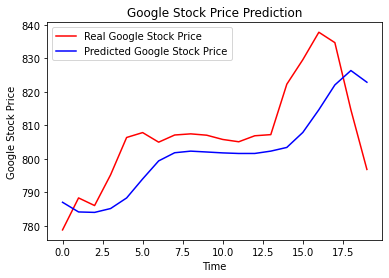

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()